# Lab9: Wprowadzenie do sieci neuronowych

In [1]:
import pandas as pd
import numpy as np

### Perceptrony i irysy

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

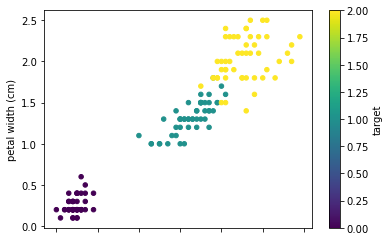

In [3]:
pd.concat([iris.data, iris.target], axis=1).plot.scatter(
    x='petal length (cm)',
    y='petal width (cm)',
    c='target',
    colormap='viridis'
)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data[["petal length (cm)", "petal width (cm)"]], iris.target, 
                                                    test_size=0.20, random_state=42)

In [5]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [6]:
# Dokładość dla każdej z klas zapisz jako lista krotek [(a_tr, a_te), ...]
per_acc = []
# wagi dla poszczególnych trzech klas zapisz jako listę 3-elementowych krotek
per_wght = []

----

In [7]:
# 0 -> true
y_0_train = (y_train == 0).astype(int)
y_0_test = (y_test == 0).astype(int)

per_clf = Perceptron()
per_clf.fit(X_train, y_0_train)

Perceptron()

In [8]:
per_clf.coef_
per_clf.intercept_

array([4.])

In [9]:
per_acc.append((accuracy_score(y_0_train, per_clf.predict(X_train)),
               accuracy_score(y_0_test, per_clf.predict(X_test))))
print(accuracy_score(y_0_train, per_clf.predict(X_train)))
print(accuracy_score(y_0_test, per_clf.predict(X_test)))

1.0
1.0


In [10]:
per_wght.append((per_clf.intercept_[0],per_clf.coef_[0][0],per_clf.coef_[0][1]))
print(per_wght)

[(4.0, -1.4999999999999993, -1.6999999999999997)]


----

In [11]:
# 1 -> true
y_1_train = (y_train == 1).astype(int)
y_1_test = (y_test == 1).astype(int)

per_clf = Perceptron()
per_clf.fit(X_train, y_1_train)

Perceptron()

In [12]:
per_acc.append((accuracy_score(y_1_train, per_clf.predict(X_train)),
               accuracy_score(y_1_test, per_clf.predict(X_test))))
print(accuracy_score(y_1_train, per_clf.predict(X_train)))
print(accuracy_score(y_1_test, per_clf.predict(X_test)))

0.6416666666666667
0.7


In [13]:
per_wght.append((per_clf.intercept_[0],per_clf.coef_[0][0],per_clf.coef_[0][1]))
print(per_wght)

[(4.0, -1.4999999999999993, -1.6999999999999997), (-9.0, 6.800000000000028, -16.099999999999973)]


----

In [14]:
# 2 -> true
y_2_train = (y_train == 2).astype(int)
y_2_test = (y_test == 2).astype(int)

per_clf = Perceptron()
per_clf.fit(X_train, y_2_train)

Perceptron()

In [15]:
per_acc.append((accuracy_score(y_2_train, per_clf.predict(X_train)),
               accuracy_score(y_2_test, per_clf.predict(X_test))))
print(accuracy_score(y_2_train, per_clf.predict(X_train)))
print(accuracy_score(y_2_test, per_clf.predict(X_test)))

0.85
0.8666666666666667


In [16]:
per_wght.append((per_clf.intercept_[0],per_clf.coef_[0][0],per_clf.coef_[0][1]))
print(per_wght)

[(4.0, -1.4999999999999993, -1.6999999999999997), (-9.0, 6.800000000000028, -16.099999999999973), (-37.0, 1.8999999999999861, 21.499999999999993)]


----
**Zapisz do pliku**

In [17]:
import pickle
with open('per_acc.pkl','wb') as f: pickle.dump(per_acc, f)

#sprawdzenie zawartosci pliku
with open('per_acc.pkl','rb') as f: print(pickle.load(f))

[(1.0, 1.0), (0.6416666666666667, 0.7), (0.85, 0.8666666666666667)]


In [18]:
with open('per_wght.pkl','wb') as f: pickle.dump(per_wght, f)

#sprawdzenie zawartosci pliku
with open('per_wght.pkl','rb') as f: print(pickle.load(f))

[(4.0, -1.4999999999999993, -1.6999999999999997), (-9.0, 6.800000000000028, -16.099999999999973), (-37.0, 1.8999999999999861, 21.499999999999993)]


### Perceptron i XOR

In [19]:
X = np.array([
    [0, 0], 
    [0, 1], 
    [1, 0], 
    [1, 1]])
y = np.array([0, 1, 1, 0])

In [20]:
per_clf_xor = Perceptron().fit(X, y)

In [21]:
print(per_clf_xor.predict(X)) # wszystko jest 0

[0 0 0 0]


In [22]:
(per_clf_xor.intercept_[0],per_clf_xor.coef_[0][0],per_clf_xor.coef_[0][1]) #wagi są 0

(0.0, 0.0, 0.0)

### XOR, drugie podejście

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
for i in range(10):
    model = keras.models.Sequential([
        keras.layers.InputLayer(input_shape=[2]),
        keras.layers.Dense(2, activation = "tanh"),
        keras.layers.Dense(1, activation = "sigmoid")
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(),
                  loss=tf.keras.losses.BinaryCrossentropy())
    history = model.fit(X, y, epochs=100, verbose=False)
    model.predict(X)
    if model.predict(X)[0] < 0.1 and model.predict(X)[1] > 0.9:
        if model.predict(X)[2] > 0.9 and model.predict(X)[3] < 0.1:
            print(model.predict(X), y)
            break

In [25]:
for i in range(100):
    model = keras.models.Sequential([
        keras.layers.InputLayer(input_shape=[2]),
        keras.layers.Dense(2, activation = "tanh"),
        keras.layers.Dense(1, activation = "sigmoid")
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),
                  loss=tf.keras.losses.MeanAbsoluteError())
    history = model.fit(X, y, epochs=100, verbose=False)
    if model.predict(X)[0] < 0.1 and model.predict(X)[1] > 0.9:
        if model.predict(X)[2] > 0.9 and model.predict(X)[3] < 0.1:
            print(model.predict(X), y)
            mlp_xor_weights = model.get_weights()
            break

[[0.00220495]
 [0.99582326]
 [0.9998161 ]
 [0.00198913]] [0 1 1 0]


In [26]:
with open('mlp_xor_weights','wb') as f: pickle.dump(mlp_xor_weights, f)

#sprawdzenie zawartosci pliku
with open('mlp_xor_weights','rb') as f: print(pickle.load(f))

[array([[-8.259538 ,  2.9282   ],
       [ 7.4384203, -6.7884016]], dtype=float32), array([-3.880966 , -2.7784348], dtype=float32), array([[ 5.8513093],
       [12.902084 ]], dtype=float32), array([12.534324], dtype=float32)]


In [27]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 6         
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy())

In [29]:
history = model.fit(X, y, epochs=100, verbose=False)

In [30]:
print(history.history['loss'])

[0.002141966950148344, 0.0021419187542051077, 0.0021418724209070206, 0.002141824923455715, 0.002141776727512479, 0.0021417296957224607, 0.0021416826639324427, 0.002141636796295643, 0.002141587669029832, 0.0021415401715785265, 0.0021414924412965775, 0.0021414444781839848, 0.0021413981448858976, 0.002141351578757167, 0.0021413015201687813, 0.0021412556525319815, 0.0021412076894193888, 0.0021411594934761524, 0.002141111996024847, 0.0021410640329122543, 0.002141017699614167, 0.0021409715991467237, 0.002140923636034131, 0.002140875905752182, 0.0021408284083008766, 0.0021407802123576403, 0.0021407348103821278, 0.002140685683116317, 0.0021406381856650114, 0.002140590688213706, 0.0021405427251011133, 0.0021404947619885206, 0.0021404477301985025, 0.0021404018625617027, 0.00214035389944911, 0.0021403059363365173, 0.002140258438885212, 0.002140211407095194, 0.002140162978321314, 0.0021401154808700085, 0.0021400689147412777, 0.0021400221157819033, 0.0021399729885160923, 0.0021399259567260742, 0.00

<AxesSubplot:>

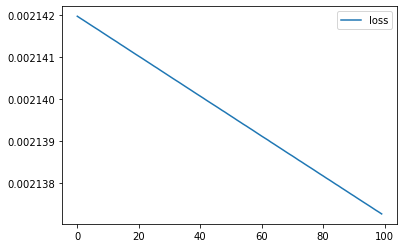

In [31]:
pd.DataFrame(history.history).plot()

In [32]:
model.evaluate(X,y)

1/1 [==============================] - 0s 127ms/step - loss: 0.0021


0.002137226052582264

In [33]:
model.predict(X)

array([[0.00220063],
       [0.9958318 ],
       [0.9998181 ],
       [0.00198504]], dtype=float32)